In [ ]:
import sys, argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    glider = np.array([[0,   0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(11*38).reshape(11, 38)

    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255

    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255

    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255

    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255

    grid[i:i+11, j:j+38] = gun

def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neighbor sum
            # using toroidal boundary conditions - x and y wrap around
            # so that the simulation takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
        # update data
        img.set_data(newGrid)
        grid[:] = newGrid[:]
        return img,

# main() function
def main():
    # Command line rgs are in sys.argv[1], sys.argv[2] ..
    # sys.argv[0] is the script name itself and can be ignored
    # parse arguments
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    # add arguments
    parser.add_argument('--grid-size', dest='N', required=False)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False)
    parser.add_argument('--glider', dest='store_true', required=False)
    parser.add_argument('--gosper', dest='store_true', required=False)
    args = parser.parse_args()

    # set grid size
    N = 100
    if args.N and int(args.N) > 8:
        N = int(args.N)

    # set animation update interval
    updateInterval = 50
    if args.interval:
        updateInterval = int(args.interval)

    # declare grid
    grid = np.array([])
    # check if "glider" demo flag is specified
    if args.glider:
        grid = np.zeros(N*N).reshape(N, N)
        addGlider(1, 1, grid)
    elif args.gosper:
        grid = np.zeros(N*N).reshape(N, N)
        addGosperGliderGun(10, 10, grid)
    else:
        # populate grid with random on/off - more off than on
        grid = randomGrid(N)

    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                  frames=10,
                                  interval=updateInterval,
                                  save_count=50)

    # # of frames?
    # set output file
    if args.movfile:
        ani.save(args.movfie, fps=30, extra_args=['-vcodec', 'libx264'])

    plt.show()

# call main
if __name__ == '__main_-':
    main()

# py conway.py --grid-size 32 --interval 500 --glider

In [ ]:
import sys, argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
ON = 255
OFF = 0
vals = [ON, OFF]
def randomGrid(N):
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
def addGlider(i, j, grid):
    glider = np.array([[0,   0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider
def addGosperGliderGun(i, j, grid):
    gun = np.zeros(11*38).reshape(11, 38)
    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255
    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255
    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255
    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255
    grid[i:i+11, j:j+38] = gun
def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] + grid[(i-1)%N, j] + grid[(i+1)%N, j] + grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
        img.set_data(newGrid)
        grid[:] = newGrid[:]
        return img,
def main():
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    parser.add_argument('--grid-size', dest='N', required=False)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False)
    parser.add_argument('--glider', dest='store_true', required=False)
    parser.add_argument('--gosper', dest='store_true', required=False)
    args = parser.parse_args()
    N = 100
    if args.N and int(args.N) > 8:
        N = int(args.N)
    updateInterval = 50
    if args.interval:
        updateInterval = int(args.interval)
    grid = np.array([])
    if args.glider:
        grid = np.zeros(N*N).reshape(N, N)
        addGlider(1, 1, grid)
    elif args.gosper:
        grid = np.zeros(N*N).reshape(N, N)
        addGosperGliderGun(10, 10, grid)
    else:
        grid = randomGrid(N)
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ), frames=10, interval=updateInterval, save_count=50)
    if args.movfile:
        ani.save(args.movfie, fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()
if __name__ == '__main_-':
    main()

In [ ]:
import sys
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):
    """Creates a random grid of N x N cells."""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):
    """Adds a glider pattern to the grid."""
    glider = np.array([[0,   0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):
    """Adds a Gosper Glider Gun pattern to the grid."""
    gun = np.zeros((11, 38))
    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255
    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255
    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255
    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255
    grid[i:i+11, j:j+38] = gun

def update(frameNum, img, grid, N):
    """Updates the grid for the next generation."""
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                          grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                          grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                          grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]) / 255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

def main():
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    parser.add_argument('--grid-size', dest='N', required=False, type=int, default=100)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False, type=int, default=100)
    parser.add_argument('--glider', dest='glider', action='store_true', required=False)
    parser.add_argument('--gosper', dest='gosper', action='store_true', required=False)
    args = parser.parse_args()

    N = args.N
    updateInterval = args.interval

    grid = np.zeros(N*N).reshape(N, N)
    if args.glider:
        addGlider(1, 1, grid)
    elif args.gosper:
        addGosperGliderGun(10, 10, grid)
    else:
        grid = randomGrid(N)

    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N), frames=20, interval=updateInterval, save_count=50)

    if args.movfile:
        ani.save(args.movfile, fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()

if __name__ == '__main__':
    main()

usage: colab_kernel_launcher.py [-h] [--grid-size N] [--mov-file MOVFILE] [--interval INTERVAL]
                                [--glider] [--gosper]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-edb269e5-a373-435f-958d-4bab7b0a880b.json


SystemExit: 2

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


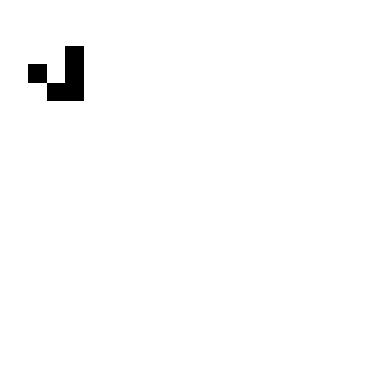

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_grid(grid):
    """Update the grid for the next generation."""
    new_grid = grid.copy()
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Count the number of live neighbors
            total = int((grid[i, (j-1)%grid.shape[1]] + grid[i, (j+1)%grid.shape[1]] +
                          grid[(i-1)%grid.shape[0], j] + grid[(i+1)%grid.shape[0], j] +
                          grid[(i-1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i-1)%grid.shape[0], (j+1)%grid.shape[1]] +
                          grid[(i+1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i+1)%grid.shape[0], (j+1)%grid.shape[1]]))

            # Apply Conway's rules
            if grid[i, j] == 1:
                if total < 2 or total > 3:
                    new_grid[i, j] = 0  # Cell dies
            else:
                if total == 3:
                    new_grid[i, j] = 1  # Cell becomes alive
    return new_grid

def animate(i):
    """Animation function to update the grid."""
    global grid
    grid = update_grid(grid)
    mat.set_data(grid)
    return [mat]

# Initialize the grid with a simple pattern (e.g., a glider)
grid_size = (20, 20)
grid = np.zeros(grid_size)
grid[1, 2] = 1
grid[2, 3] = 1
grid[3, 1] = 1
grid[3, 2] = 1
grid[3, 3] = 1

# Set up the figure and axis
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap='binary')
plt.axis('off')

# Create an animation
ani = animation.FuncAnimation(fig, animate, frames=20, interval=500, blit=True)

# Show the animation
plt.show()

<ipython-input-2-2451f484e895>:57: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=20.
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, generation_count, ax),


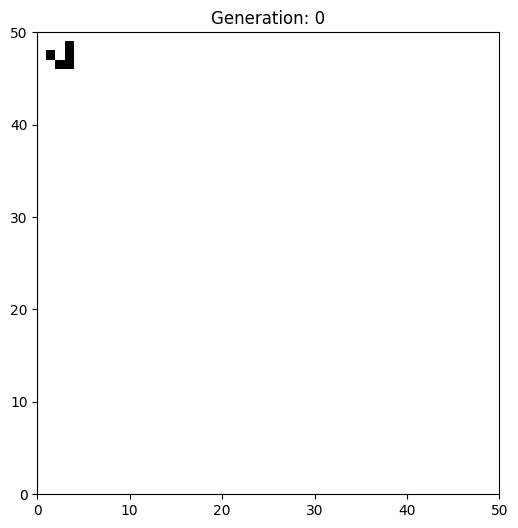

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    glider = np.array([[0,   0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider

def update(frameNum, img, grid, N, generation_count, ax):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neighbor sum
            # using toroidal boundary conditions - x and y wrap around
            # so that the simulation takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                          grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                          grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                          grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]) / 255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]

    # update generation count
    generation_count[0] += 1
    ax.set_title(f"generation {generation_count[0]}")

    return img,

def main():
    N = 50
    grid = np.zeros(N*N).reshape(N, N)
    addGlider(1, 1, grid)

    fig, ax = plt.subplots(figsize=(6, 6))
    img = ax.imshow(grid, interpolation='nearest',
                    cmap='binary', extent=[0, N, 0, N])

    generation_count = [0]
    ax.set_title(f"generation {generation_count[0]}")

    ani = animation.FuncAnimation(fig, update,
                                  fargs=(img, grid, N, generation_count, ax),
                                  frames=20,
                                  interval=200,
                                  save_count=50)

    plt.show()

if __name__ == '__main__':
    main()